In [1]:
from mmpose.apis import (inference_bottom_up_pose_model, init_pose_model,
                         vis_pose_result)
from mmcv import Config
from mmpose.datasets import build_dataloader, build_dataset
from mmpose.datasets import DatasetInfo
from matplotlib import pyplot as plt
import os
import cv2

In [2]:
from mmpose.apis import (inference_bottom_up_pose_model, init_pose_model,
                         vis_pose_result)
# from mmpose.datasets import build_dataloader, build_dataset
from mmpose.models import build_posenet

In [3]:
checkpoint = '/mnt/ssd/marley/ID_Card/mmpose/work_dirs/baseline_4_higherhrnet_640x640/epoch_51.pth'
config_file = '/mnt/ssd/marley/ID_Card/mmpose/configs/ID_card/baseline_4_higherhrnet_w32_IDCard_640x640.py'
cfg = Config.fromfile(config_file)

In [4]:
model = init_pose_model(cfg, checkpoint)
dataset_info = model.cfg.data['test'].get('dataset_info', None)
dataset_info = DatasetInfo(dataset_info)

Use load_from_local loader


In [5]:
# images = [os.path.join('/mnt/ssd/marley/ID_Card/ID_card_data/filter_kpt/val',img) for img in os.listdir('/mnt/ssd/marley/ID_Card/ID_card_data/filter_kpt/val') if img.endswith('.jpg')]
# dataset = build_dataset(cfg.data.test, dict(test_mode=True))

0.5
[{'keypoints': array([[7.3656250e+02, 2.3437500e-01, 1.0000000e+00],
       [2.2187500e+01, 4.9218750e+00, 1.0000000e+00],
       [6.1718750e+02, 2.4960938e+02, 1.0000000e+00],
       [7.6406250e+02, 5.9507812e+02, 1.0000000e+00]], dtype=float32), 'score': 0.43738067, 'area': 441299.72}]


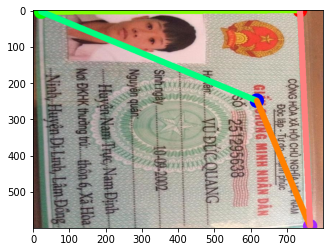

In [11]:
img = '/mnt/ssd/marley/ID_Card/ID_card_data/test/test_484.jpg'
keypoint_results, returned_outputs = inference_bottom_up_pose_model(model, img, 'BottomUpIDCardDataset', dataset_info, return_heatmap=True, pose_nms_thr=0.5)
# for result in keypoint_results:
#     result['keypoints'][:,0] = result['keypoints'][:,0]/0.23958820776789894
#     result['keypoints'][:,1] = result['keypoints'][:,1]/0.27871529667936856
# print(keypoint_results)
# keypoint_results = [kp for kp in keypoint_results if kp['score'] >= 0.3]
print(keypoint_results)
img = cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2RGB)
vis_result = vis_pose_result(model,
                             img,
                             keypoint_results,
                             radius=20,
                             thickness=15,
                             dataset=model.cfg.data.test.type,
                             show=False)
# vis_result = cv2.cvtColor(vis_result, cv2.COLOR_BGR2RGB)
plt.imshow(vis_result)

In [7]:
# from skimage import exposure
# img = cv2.resize(vis_result, (640, 512))
# for slice in heatmap:
#     map_img = exposure.rescale_intensity(slice, out_range=(0, 255))
#     map_img = np.uint8(map_img) 
#     heatmap_img = cv2.applyColorMap(map_img, cv2.COLORMAP_JET)
#     img = cv2.addWeighted(heatmap_img, 0.3, img, 0.8, 0)

In [8]:
# fin = cv2.addWeighted(heatmap_img, 0.5, img, 0.5, 0)
# plt.imshow(fin)

In [9]:
# def _draw_target(img, joints):
#     """Draw target joints"""
#     img_copy = img
#     colors = [[255, 0, 0], [0, 255, 0], [0, 0, 255], [128, 128, 128]]
#     for i in range(joints.shape[0]): # Num card in image
#         for j in range(joints.shape[1]): # Num keypoints
#             x = int(joints[i, j, 0]* (w/512.0)) 
#             y = int(joints[i, j, 1]* (h/512.0)) 
#             print(x,y)
#             img_copy = cv2.circle(img_copy, (x, y),
#                                         radius=4, color=colors[j], thickness=5)
#     return img_copy

In [10]:
img = _draw_target(img, joint)

NameError: name '_draw_target' is not defined

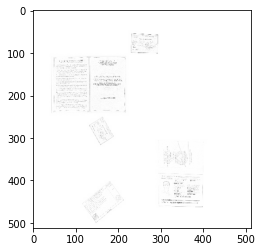

In [ ]:
plt.imshow(img)